In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import sklearn
import os
import seaborn as sns
from path import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load data CSV
file_path = Path('Resources/reporteTecno.csv')
prices_df = pd.read_csv(file_path, encoding="ISO-8859-1")
prices_df.head()

,id,entidad,colonia,municipio,codigo_postal,tipo,m2Terreno,m2Construccion,recamaras,banos,medio_bano,Baños,estacionamientos,pisos,antiguedad,cuotaMantto,precioSalida,precioVenta
0,10293,CIUDAD DE MEXICO,Del Valle Norte,Benito JuÃ¡rez,3103,TERRENO,421,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,20000000,17000000
1,11382,CIUDAD DE MEXICO,Mixcoac,Benito JuÃ¡rez,3910,TERRENO,385.12,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Mas de 30,NaN,18500000,17000000
2,13132,CIUDAD DE MEXICO,Portales Sur,Benito JuÃ¡rez,3300,CASA,207,230.0,4.0,2.0,NaN,2.0,3.0,1.0,Mas de 30,NaN,6800000,6000000
3,17107,CIUDAD DE MEXICO,Jardines de CoyoacÃ¡n,CoyoacÃ¡n,4890,CASA,482,637.0,4.0,5.0,1.0,5.5,6.0,3.0,ENTRE 21 - 30 AÃOS,NaN,15000000,14200000
4,17799,CIUDAD DE MEXICO,Paulino Navarro,CuauhtÃ©moc,6870,EDIFICIO,542,542.0,NaN,NaN,NaN,0.0,NaN,3.0,Mas de 30,NaN,62330000,62330000


In [3]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1384 non-null   int64  
 1   entidad           1383 non-null   object 
 2   colonia           1383 non-null   object 
 3   municipio         1383 non-null   object 
 4   codigo_postal     1384 non-null   int64  
 5   tipo              1384 non-null   object 
 6   m2Terreno         693 non-null    object 
 7   m2Construccion    1294 non-null   float64
 8   recamaras         1213 non-null   float64
 9   banos             1236 non-null   float64
 10  medio_bano        463 non-null    float64
 11  Baños             1384 non-null   float64
 12  estacionamientos  1033 non-null   float64
 13  pisos             1059 non-null   float64
 14  antiguedad        1167 non-null   object 
 15  cuotaMantto       400 non-null    object 
 16  precioSalida      1384 non-null   int64  


In [4]:
prices_df['entidad'].value_counts()

CIUDAD DE MEXICO    1257
ESTADO DE MEXICO      93
PUEBLA                32
JALISCO                1
Name: entidad, dtype: int64

In [5]:
prices_df['colonia'].value_counts()

NAPOLES                          29
CIUDAD SATELITE                  25
ROMA NORTE                       21
DEL VALLE NORTE                  20
DEL VALLE SUR                    20
                                 ..
Santa MarÃ­a Tepepan              1
SANTA FE IMSS                     1
NUEVA ROSITA                      1
JUSTO SIERRA                      1
SAN BERNARDINO TLAXCALANCINGO     1
Name: colonia, Length: 380, dtype: int64

In [6]:
prices_df['municipio'].value_counts()

BENITO JUAREZ             283
COYOACAN                  206
TLALPAN                   158
CUAUHTEMOC                108
IZTAPALAPA                107
ALVARO OBREGON             77
MIGUEL HIDALGO             74
NAUCALPAN DE JUAREZ        55
LA MAGDALENA CONTRERAS     38
VENUSTIANO CARRANZA        38
IZTACALCO                  37
XOCHIMILCO                 32
PUEBLA                     30
AZCAPOTZALCO               25
GUSTAVO A. MADERO          23
Benito JuÃ¡rez             21
TLALNEPANTLA DE BAZ        15
NAUCALPAN DE JUÃ¡REZ       12
ATIZAPAN DE ZARAGOZA       10
CoyoacÃ¡n                   9
Tlalpan                     4
CuauhtÃ©moc                 3
BENITO JUÃ¡REZ              3
COYOACÃ¡N                   3
Xochimilco                  2
Ãlvaro ObregÃ³n            2
Iztapalapa                  2
Iztacalco                   1
ÃLVARO OBREGÃ³N            1
GUADALAJARA                 1
SAN PEDRO CHOLULA           1
Naucalpan de JuÃ¡rez        1
SAN ANDRES CHOLULA          1
Name: muni

In [7]:
prices_df = prices_df.replace({"Benito JuÃ¡rez": "BENITO JUAREZ", "NAUCALPAN DE JUÃ¡REZ": "NAUCALPAN DE JUAREZ", "CoyoacÃ¡n": "COYOACAN", "Tlalpan":"TLALPAN", "CuauhtÃ©moc":"CUAUHTEMOC", "BENITO JUÃ¡REZ":"BENITO JUAREZ", "COYOACÃ¡N":"COYOACAN", "Xochimilco": "XOCHIMILCO", "Ãlvaro ObregÃ³n": "ALVARO OBREGON", "Iztapalapa": "IZTAPALAPA", "Iztacalco":"IZTACALCO", "ÃLVARO OBREGÃ³N": "ALVARO OBREGON", "Naucalpan de JuÃ¡rez": "NAUCALPAN DE JUAREZ"})
prices_df.municipio.value_counts()

BENITO JUAREZ             307
COYOACAN                  218
TLALPAN                   162
CUAUHTEMOC                111
IZTAPALAPA                109
ALVARO OBREGON             80
MIGUEL HIDALGO             74
NAUCALPAN DE JUAREZ        68
IZTACALCO                  38
VENUSTIANO CARRANZA        38
LA MAGDALENA CONTRERAS     38
XOCHIMILCO                 34
PUEBLA                     30
AZCAPOTZALCO               25
GUSTAVO A. MADERO          23
TLALNEPANTLA DE BAZ        15
ATIZAPAN DE ZARAGOZA       10
GUADALAJARA                 1
SAN PEDRO CHOLULA           1
SAN ANDRES CHOLULA          1
Name: municipio, dtype: int64

In [8]:
prices_df['tipo'].value_counts()

DEPARTAMENTO          660
CASA                  494
TERRENO                86
CASA EN CONDOMINIO     45
LOCAL COMERCIAL        28
EDIFICIO               23
OFICINA                16
PENT HOUSE             14
CASA DUPLEX            10
BODEGA                  8
Name: tipo, dtype: int64

In [9]:
# Combine similar terms
prices_df = prices_df.replace({"CASA DUPLEX": "CASA", "CASA EN CONDOMINIO": "CASA", "PENT HOUSE": "DEPARTAMENTO"})
tipo_counts = prices_df.tipo.value_counts()
tipo_counts

DEPARTAMENTO       674
CASA               549
TERRENO             86
LOCAL COMERCIAL     28
EDIFICIO            23
OFICINA             16
BODEGA               8
Name: tipo, dtype: int64

In [10]:
# Bin data
replace_tipo = list(tipo_counts[tipo_counts <50].index)
for tipo in replace_tipo:
    prices_df.tipo = prices_df.tipo.replace(tipo, "OTRO")
    
prices_df.tipo.value_counts()

DEPARTAMENTO    674
CASA            549
TERRENO          86
OTRO             75
Name: tipo, dtype: int64

In [11]:
prices_df.m2Terreno = pd.to_numeric(prices_df.m2Terreno, 'coerce')
prices_df.m2Construccion = pd.to_numeric(prices_df.m2Construccion, 'coerce')

In [12]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1384 non-null   int64  
 1   entidad           1383 non-null   object 
 2   colonia           1383 non-null   object 
 3   municipio         1383 non-null   object 
 4   codigo_postal     1384 non-null   int64  
 5   tipo              1384 non-null   object 
 6   m2Terreno         675 non-null    float64
 7   m2Construccion    1294 non-null   float64
 8   recamaras         1213 non-null   float64
 9   banos             1236 non-null   float64
 10  medio_bano        463 non-null    float64
 11  Baños             1384 non-null   float64
 12  estacionamientos  1033 non-null   float64
 13  pisos             1059 non-null   float64
 14  antiguedad        1167 non-null   object 
 15  cuotaMantto       400 non-null    object 
 16  precioSalida      1384 non-null   int64  


In [13]:
prices_df = prices_df.drop(["id"], axis=1)
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1383 non-null   object 
 1   colonia           1383 non-null   object 
 2   municipio         1383 non-null   object 
 3   codigo_postal     1384 non-null   int64  
 4   tipo              1384 non-null   object 
 5   m2Terreno         675 non-null    float64
 6   m2Construccion    1294 non-null   float64
 7   recamaras         1213 non-null   float64
 8   banos             1236 non-null   float64
 9   medio_bano        463 non-null    float64
 10  Baños             1384 non-null   float64
 11  estacionamientos  1033 non-null   float64
 12  pisos             1059 non-null   float64
 13  antiguedad        1167 non-null   object 
 14  cuotaMantto       400 non-null    object 
 15  precioSalida      1384 non-null   int64  
 16  precioVenta       1384 non-null   int64  


In [14]:
prices_df = prices_df.drop(["antiguedad", "cuotaMantto"], axis=1)
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1383 non-null   object 
 1   colonia           1383 non-null   object 
 2   municipio         1383 non-null   object 
 3   codigo_postal     1384 non-null   int64  
 4   tipo              1384 non-null   object 
 5   m2Terreno         675 non-null    float64
 6   m2Construccion    1294 non-null   float64
 7   recamaras         1213 non-null   float64
 8   banos             1236 non-null   float64
 9   medio_bano        463 non-null    float64
 10  Baños             1384 non-null   float64
 11  estacionamientos  1033 non-null   float64
 12  pisos             1059 non-null   float64
 13  precioSalida      1384 non-null   int64  
 14  precioVenta       1384 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 162.3+ KB


In [15]:
prices_df = prices_df.drop(["banos", "medio_bano"], axis=1)
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1383 non-null   object 
 1   colonia           1383 non-null   object 
 2   municipio         1383 non-null   object 
 3   codigo_postal     1384 non-null   int64  
 4   tipo              1384 non-null   object 
 5   m2Terreno         675 non-null    float64
 6   m2Construccion    1294 non-null   float64
 7   recamaras         1213 non-null   float64
 8   Baños             1384 non-null   float64
 9   estacionamientos  1033 non-null   float64
 10  pisos             1059 non-null   float64
 11  precioSalida      1384 non-null   int64  
 12  precioVenta       1384 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 140.7+ KB


In [16]:
prices_df = prices_df.drop(["precioSalida"], axis=1)
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1383 non-null   object 
 1   colonia           1383 non-null   object 
 2   municipio         1383 non-null   object 
 3   codigo_postal     1384 non-null   int64  
 4   tipo              1384 non-null   object 
 5   m2Terreno         675 non-null    float64
 6   m2Construccion    1294 non-null   float64
 7   recamaras         1213 non-null   float64
 8   Baños             1384 non-null   float64
 9   estacionamientos  1033 non-null   float64
 10  pisos             1059 non-null   float64
 11  precioVenta       1384 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 129.9+ KB


In [17]:
# Replace NaN with 0 recámaras
prices_df["recamaras"] = prices_df["recamaras"].fillna(0)
prices_df["pisos"] = prices_df["pisos"].fillna(1)
prices_df['estacionamientos'] = prices_df['estacionamientos'].fillna(0)
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1383 non-null   object 
 1   colonia           1383 non-null   object 
 2   municipio         1383 non-null   object 
 3   codigo_postal     1384 non-null   int64  
 4   tipo              1384 non-null   object 
 5   m2Terreno         675 non-null    float64
 6   m2Construccion    1294 non-null   float64
 7   recamaras         1384 non-null   float64
 8   Baños             1384 non-null   float64
 9   estacionamientos  1384 non-null   float64
 10  pisos             1384 non-null   float64
 11  precioVenta       1384 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 129.9+ KB


In [18]:
# replace Nan in m2construccion with m2terreno
prices_df.m2Construccion.fillna(prices_df.m2Terreno, inplace=True)
prices_df.m2Terreno.fillna(prices_df.m2Construccion, inplace=True)
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1383 non-null   object 
 1   colonia           1383 non-null   object 
 2   municipio         1383 non-null   object 
 3   codigo_postal     1384 non-null   int64  
 4   tipo              1384 non-null   object 
 5   m2Terreno         1376 non-null   float64
 6   m2Construccion    1376 non-null   float64
 7   recamaras         1384 non-null   float64
 8   Baños             1384 non-null   float64
 9   estacionamientos  1384 non-null   float64
 10  pisos             1384 non-null   float64
 11  precioVenta       1384 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 129.9+ KB


In [19]:
prices_df = prices_df.dropna()

In [20]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 1383
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1375 non-null   object 
 1   colonia           1375 non-null   object 
 2   municipio         1375 non-null   object 
 3   codigo_postal     1375 non-null   int64  
 4   tipo              1375 non-null   object 
 5   m2Terreno         1375 non-null   float64
 6   m2Construccion    1375 non-null   float64
 7   recamaras         1375 non-null   float64
 8   Baños             1375 non-null   float64
 9   estacionamientos  1375 non-null   float64
 10  pisos             1375 non-null   float64
 11  precioVenta       1375 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 139.6+ KB


In [21]:
prices_df['precioVenta'] = prices_df['precioVenta'].astype(np.float64)
prices_df['precioVenta'] = prices_df['precioVenta'].astype(np.float64)


In [22]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 1383
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1375 non-null   object 
 1   colonia           1375 non-null   object 
 2   municipio         1375 non-null   object 
 3   codigo_postal     1375 non-null   int64  
 4   tipo              1375 non-null   object 
 5   m2Terreno         1375 non-null   float64
 6   m2Construccion    1375 non-null   float64
 7   recamaras         1375 non-null   float64
 8   Baños             1375 non-null   float64
 9   estacionamientos  1375 non-null   float64
 10  pisos             1375 non-null   float64
 11  precioVenta       1375 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 139.6+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder
# Use labelencoder to convert tipo into integers
prices_df['tipo'] = LabelEncoder().fit_transform(prices_df['tipo'])
prices_df['entidad'] = LabelEncoder().fit_transform(prices_df['entidad'])
prices_df['municipio'] = LabelEncoder().fit_transform(prices_df['municipio'])
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 1383
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1375 non-null   int32  
 1   colonia           1375 non-null   object 
 2   municipio         1375 non-null   int32  
 3   codigo_postal     1375 non-null   int64  
 4   tipo              1375 non-null   int32  
 5   m2Terreno         1375 non-null   float64
 6   m2Construccion    1375 non-null   float64
 7   recamaras         1375 non-null   float64
 8   Baños             1375 non-null   float64
 9   estacionamientos  1375 non-null   float64
 10  pisos             1375 non-null   float64
 11  precioVenta       1375 non-null   float64
dtypes: float64(7), int32(3), int64(1), object(1)
memory usage: 123.5+ KB


In [24]:
prices_df = prices_df.drop(["colonia"], axis=1)
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 1383
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           1375 non-null   int32  
 1   municipio         1375 non-null   int32  
 2   codigo_postal     1375 non-null   int64  
 3   tipo              1375 non-null   int32  
 4   m2Terreno         1375 non-null   float64
 5   m2Construccion    1375 non-null   float64
 6   recamaras         1375 non-null   float64
 7   Baños             1375 non-null   float64
 8   estacionamientos  1375 non-null   float64
 9   pisos             1375 non-null   float64
 10  precioVenta       1375 non-null   float64
dtypes: float64(7), int32(3), int64(1)
memory usage: 112.8 KB


In [25]:
prices_df.describe()

,entidad,municipio,codigo_postal,tipo,m2Terreno,m2Construccion,recamaras,Baños,estacionamientos,pisos,precioVenta
count,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1.375000e+03
mean,0.138909,7.684364,11948.676364,0.776000,159.201047,178.132960,2.636364,2.104000,1.476364,2.890909,5.147507e+06
std,0.510778,5.608595,15489.618643,0.800749,151.350895,221.577165,1.544154,1.418871,1.372686,1.913264,5.580220e+06
min,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.200000e+05
25%,0.000000,3.000000,3765.000000,0.000000,70.000000,70.000000,2.000000,1.000000,0.000000,1.000000,2.300000e+06
50%,0.000000,5.000000,6700.000000,1.000000,111.000000,120.000000,3.000000,2.000000,1.000000,2.000000,3.700000e+06
75%,0.000000,12.000000,14060.000000,1.000000,200.000000,232.000000,3.000000,3.000000,2.000000,4.000000,5.995000e+06
max,3.000000,19.000000,72820.000000,3.000000,1500.000000,5675.000000,8.000000,8.500000,6.000000,11.000000,7.500000e+07


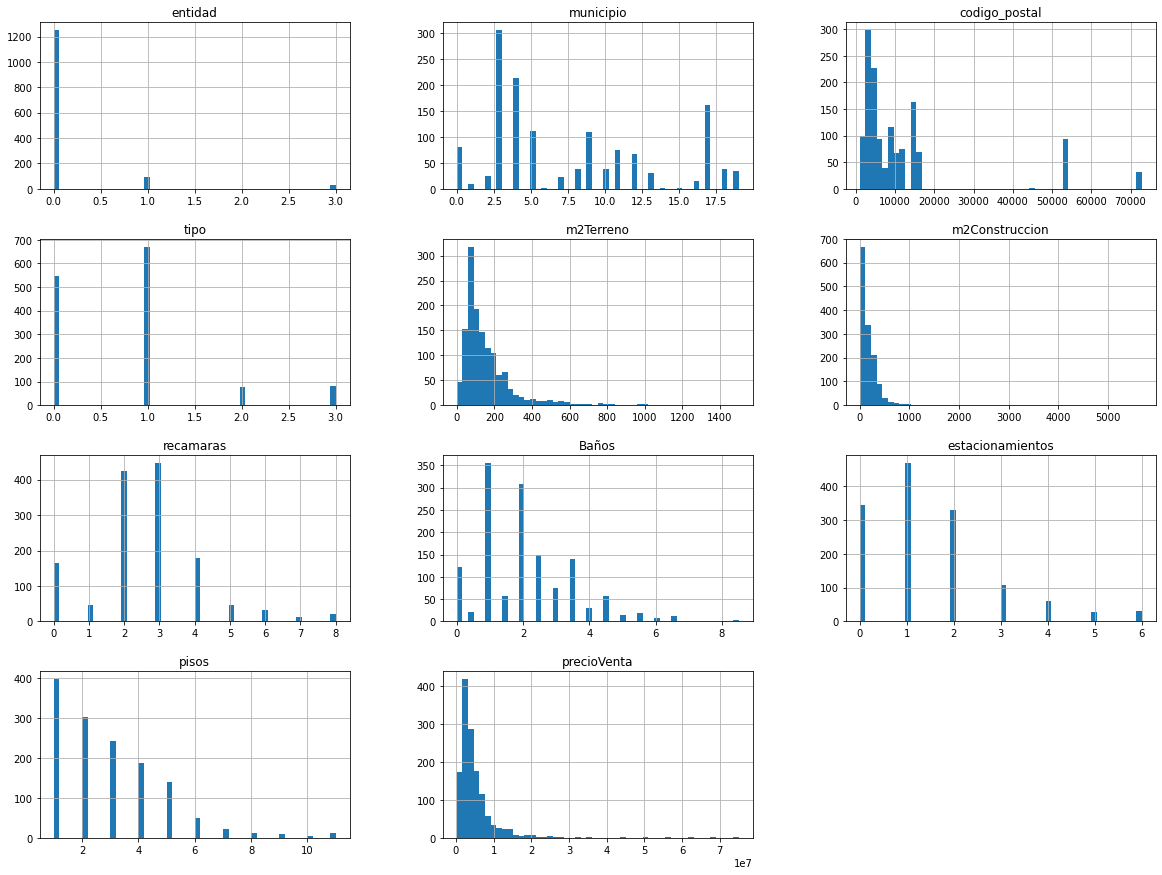

In [26]:
prices_df.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
corr_matrix = prices_df.corr()
corr_matrix['precioVenta'].sort_values(ascending=False)

precioVenta         1.000000
m2Construccion      0.708259
m2Terreno           0.634484
estacionamientos    0.253749
Baños               0.204082
tipo                0.042445
recamaras           0.029989
codigo_postal      -0.014308
entidad            -0.018405
municipio          -0.073174
pisos              -0.096772
Name: precioVenta, dtype: float64

In [36]:
prices_df = prices_df.drop(["pisos"], axis=1)

In [57]:
# Define target
y = prices_df['precioVenta']
# Define features set
X = prices_df.drop(columns='precioVenta')

In [58]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1100, 9)
(275, 9)
(1100,)
(275,)


In [60]:
from sklearn.preprocessing import StandardScaler
# Create StandardScaler instance
scaler = StandardScaler()
# Fit Standard Scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance
model = RandomForestClassifier(n_estimators=500, random_state=1)

# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [62]:
# Making predictions
predictions = model.predict(X_test_scaled)

In [63]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.02181818181818182

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                               max_iter=500,
                               random_state=1)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))

0.02181818181818182
